## Importing the required Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup

import re

Assigning the page address to the url

In [2]:
url= 'https://www.flipkart.com/search?q=healthcare+products&otracker=AS_Query_HistoryAutoSuggest_3_0&otracker1=AS_Query_HistoryAutoSuggest_3_0&marketplace=FLIPKART&as-show=on&as=off&as-pos=3&as-type=HISTORY'

In [3]:
page = requests.get(url)

In [4]:
page.status_code

200

In [5]:
pagecontent = page.text

In [6]:
pagecontent

'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.104e9a.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" h

### Web Scrapping

In [7]:
soup = BeautifulSoup(pagecontent)

In [8]:
list1 = soup.find_all('div',attrs={'class':'_4ddWXP'})
list1

[<div class="_4ddWXP"><a class="_2rpwqI" href="/physio-usa-1021-full-body-pains-relief-massager-machine-massage-electric-massagers-back-legs-foot-calf-neck-shoulder-head-vibration-men-women/p/itm9f9221cd22ce1?pid=MASFM6JGBCYBTWMG&amp;lid=LSTMASFM6JGBCYBTWMGX0OVUK&amp;marketplace=FLIPKART&amp;q=healthcare+products&amp;store=search.flipkart.com&amp;srno=s_1_1&amp;otracker=AS_Query_HistoryAutoSuggest_3_0&amp;otracker1=AS_Query_HistoryAutoSuggest_3_0&amp;fm=organic&amp;iid=b10bc3b6-4db7-44b7-9dff-b1d21a3f88d1.MASFM6JGBCYBTWMG.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=acrmtc5y7k0000001663311476600&amp;qH=89da93cbc49f0924" rel="noopener noreferrer" target="_blank"><div><div><div class="CXW8mj" style="height:280px;width:200px"><img alt="DR PHYSIO (USA) 1021 Full Body Pains Relief Massager Machine Massage Machine Electric Massagers Back Legs Foot Calf Neck Shoulder Head With Vibration For Men and Women Massager" class="_396cs4 _3exPp9" src="https://rukminim1.flixcart.com/image/612/612/l0mr7gw0

In [9]:
name = soup.find_all('a',attrs={'class':'s1Q9rs'})
name

[<a class="s1Q9rs" href="/physio-usa-1021-full-body-pains-relief-massager-machine-massage-electric-massagers-back-legs-foot-calf-neck-shoulder-head-vibration-men-women/p/itm9f9221cd22ce1?pid=MASFM6JGBCYBTWMG&amp;lid=LSTMASFM6JGBCYBTWMGX0OVUK&amp;marketplace=FLIPKART&amp;q=healthcare+products&amp;store=search.flipkart.com&amp;srno=s_1_1&amp;otracker=AS_Query_HistoryAutoSuggest_3_0&amp;otracker1=AS_Query_HistoryAutoSuggest_3_0&amp;fm=organic&amp;iid=b10bc3b6-4db7-44b7-9dff-b1d21a3f88d1.MASFM6JGBCYBTWMG.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=acrmtc5y7k0000001663311476600&amp;qH=89da93cbc49f0924" rel="noopener noreferrer" target="_blank" title="DR PHYSIO (USA) 1021 Full Body Pains Relief Massager Machine Massage Machine Electric Massagers Back Legs Foot Calf Neck Shoulder Head With Vibration For Men and Women Massager">DR PHYSIO (USA) 1021 Full Body Pains Relief Massager Ma...</a>,
 <a class="s1Q9rs" href="/asbah-professional-handheld-dual-speed-electric-massager-head-shoulder-other-bod

In [10]:
for i in list1:
    name=i.find('a',class_='s1Q9rs')
    print(name.text)

DR PHYSIO (USA) 1021 Full Body Pains Relief Massager Ma...
Asbah Professional Handheld Dual Speed Electric Massage...
DR PHYSIO (USA) Active Hammer Electric Powerful Body Ma...
Neuherbs T7 Ultra Test-ON
JSB HF91 Blood Circulation Massager Machine with Accupr...
AGARO 33324 Relaxo Electric Massager Handheld for Pain ...
Purna Gummies Women's Immunity Multivitamin Strawberry ...
Saptamveda Organic Shatavari Capsules with 20% Saponins
MUSCLEBLAZE Liquid L-Carnitine
End2End Nutrition Testo 10X Natural Testosterone Booste...
BIGMUSCLES NUTRITION Omega-3 Fish Oil Triple Strength|H...
ForKids Magnesium + Zinc for kids with Magnesium Citrat...
BOLDESSENTIALS Melatonin 10mg With Tagar 250mg & Vitami...
Smars Upal-9 Cordless Rechargeable trimmer Fully Waterp...
Accu-Chek Active 50 Test Strips
CrazyBulk ANVAROL (ANAVAR) Natural Alternative for Cutt...
Maadurga ayurved bhander RUMA T PAIN RELIEF CAPSULE JOI...
Maadurga ayurved bhander RUMA T PAIN RELIEF CAPSULE JOI...
Krishna Creation Hair dryer a

In [11]:
product = []
price = []
offer = []
views = []
rating = []
discount = []
delivery = []

In [12]:
for i in range(1,30):
    url = 'https://www.flipkart.com/search?q=healthcare+products&otracker=AS_Query_HistoryAutoSuggest_3_0&otracker1=AS_Query_HistoryAutoSuggest_3_0&marketplace=FLIPKART&as-show=on&as=off&as-pos=3&as-type=HISTORY&page='+str(i) 
    page = requests.get(url)
    pagecontent = page.text
    soup = BeautifulSoup(pagecontent)
    list1 = soup.find_all('div',class_='_4ddWXP')
        
    for j in list1:
        
        product_ = j.find('a',class_='s1Q9rs')
        if product_ is None:
            product.append(np.NaN)
        else:
            product.append(product_.text)
            
        price_ = j.find('div',class_='_30jeq3')
        if price_ is None:
            price.append(np.NaN)
        else:
            price.append(price_.text)
            
        offer_ = j.find('div',class_='_3I9_wc')
        if offer_ is None:
            offer.append(np.NaN)
        else:
            offer.append(offer_.text)
            
        views_ = j.find('span',class_='_2_R_DZ')
        if views_ is None:
            views.append(np.NaN)
        else:
            views.append(views_.text)
            
        rating_ = j.find('div',class_='_3LWZlK')
        if rating_ is None:
            rating.append(np.NaN)
        else:
            rating.append(rating_.text) 
            
        discount_ = j.find('div',class_='_3Ay6Sb')
        if discount_ is None:
            discount.append(np.NaN)
        else:
            discount.append(discount_.text) 
            
        delivery_ = j.find('div',class_='_2Tpdn3')
        if delivery_ is None:
            delivery.append(np.NaN)
        else:
            delivery.append(delivery_.text)

In [13]:
len(product)

1000

In [14]:
len(price)

1000

In [15]:
len(offer)

1000

In [16]:
len(views)

1000

In [17]:
len(rating)

1000

In [18]:
len(discount)

1000

In [19]:
len(delivery)

1000

In [20]:
hcp = pd.DataFrame({'product':product,'price':price,'offer':offer,'views':views,'rating':rating,'discount':discount,'delivery':delivery})

In [21]:
hcp.head(100)

,product,price,offer,views,rating,discount,delivery
0,DR PHYSIO (USA) 1021 Full Body Pains Relief Ma...,"₹1,299","₹2,500","(52,897)",4.3,48% off,Free delivery
1,Asbah Professional Handheld Dual Speed Electri...,₹999,"₹4,699",(3),3.7,78% off,Free delivery
2,DR PHYSIO (USA) Active Hammer Electric Powerfu...,"₹1,299","₹1,834","(12,805)",4.2,29% off,Free delivery
3,Dabas Organic Skin Glow Plant Collagen Builder...,₹636,₹795,(4),5,20% off,Free delivery
4,JSB HF91 Blood Circulation Massager Machine wi...,"₹5,399","₹11,500",(399),4.1,53% off,Free delivery
...,...,...,...,...,...,...,...
95,Azani Pure & ultra-strong Omega 3 Fish Oil,₹499,₹999,(230),4.2,50% off,Free delivery
96,Ozomax BL-320-FC Face Care Reversible Dual Pow...,₹798,₹840,"(1,328)",3.9,5% off,Free delivery
97,JAGDIV Mouth Massager Mouth Massager Massager,₹269,₹999,NaN,NaN,73% off,Free delivery
98,OneLife Testo Fuel Stamina Booster-60 Tablets,₹375,"₹1,099",(296),4,65% off,Free delivery


### Data Cleaning

In [22]:
hcp.duplicated().value_counts()

False    715
True     285
dtype: int64

In [23]:
hcp.drop_duplicates(inplace=True)

In [24]:
hcp.duplicated().sum()

0

In [25]:
hcp.tail()

,product,price,offer,views,rating,discount,delivery
993,Pick Ur Needs Beard Trimmer Cordless with Quic...,₹562,"₹1,099",(28),4,48% off,Free delivery
994,ADFG GEEMY New Corded Professional Electric Ha...,"₹1,529","₹3,399",NaN,NaN,55% off,Free delivery
996,"AZDC KEMEI Professional Corded Hair Clipper, f...","₹1,709","₹3,799",NaN,NaN,55% off,Free delivery
997,VVFNBBNSCCS hair trimmer Trimmer 150 min Runt...,"₹2,199","₹3,599",NaN,NaN,38% off,Free delivery
998,Evolife Crown hair dryer black Hair Dryer,₹699,"₹1,299",NaN,NaN,46% off,Free delivery


In [26]:
hcp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 998
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   product   715 non-null    object
 1   price     715 non-null    object
 2   offer     706 non-null    object
 3   views     358 non-null    object
 4   rating    358 non-null    object
 5   discount  706 non-null    object
 6   delivery  620 non-null    object
dtypes: object(7)
memory usage: 44.7+ KB


In [27]:
hcp

,product,price,offer,views,rating,discount,delivery
0,DR PHYSIO (USA) 1021 Full Body Pains Relief Ma...,"₹1,299","₹2,500","(52,897)",4.3,48% off,Free delivery
1,Asbah Professional Handheld Dual Speed Electri...,₹999,"₹4,699",(3),3.7,78% off,Free delivery
2,DR PHYSIO (USA) Active Hammer Electric Powerfu...,"₹1,299","₹1,834","(12,805)",4.2,29% off,Free delivery
3,Dabas Organic Skin Glow Plant Collagen Builder...,₹636,₹795,(4),5,20% off,Free delivery
4,JSB HF91 Blood Circulation Massager Machine wi...,"₹5,399","₹11,500",(399),4.1,53% off,Free delivery
...,...,...,...,...,...,...,...
993,Pick Ur Needs Beard Trimmer Cordless with Quic...,₹562,"₹1,099",(28),4,48% off,Free delivery
994,ADFG GEEMY New Corded Professional Electric Ha...,"₹1,529","₹3,399",NaN,NaN,55% off,Free delivery
996,"AZDC KEMEI Professional Corded Hair Clipper, f...","₹1,709","₹3,799",NaN,NaN,55% off,Free delivery
997,VVFNBBNSCCS hair trimmer Trimmer 150 min Runt...,"₹2,199","₹3,599",NaN,NaN,38% off,Free delivery


In [28]:
hcp['price'].str.split('₹',n=1,expand=True)

,0,1
0,,"1,299"
1,,999
2,,"1,299"
3,,636
4,,"5,399"
...,...,...
993,,562
994,,"1,529"
996,,"1,709"
997,,"2,199"


In [29]:
hcp.describe()

,product,price,offer,views,rating,discount,delivery
count,715,715,706,358,358,706,620
unique,689,347,240,177,27,85,4
top,Nature Sure Agnimantha Weight Loss Formula for...,₹329,₹999,(3),4.3,55% off,Free delivery
freq,4,29,71,22,42,43,601


In [30]:
hcp.isnull().sum()

product       0
price         0
offer         9
views       357
rating      357
discount      9
delivery     95
dtype: int64

In [31]:
hcp['offer'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
993    False
994    False
996    False
997    False
998    False
Name: offer, Length: 715, dtype: bool

In [32]:
hcp['offer'].fillna(value='₹999',inplace=True)

In [33]:
hcp.isnull().sum()

product       0
price         0
offer         0
views       357
rating      357
discount      9
delivery     95
dtype: int64

In [34]:
hcp.isnull().sum()

product       0
price         0
offer         0
views       357
rating      357
discount      9
delivery     95
dtype: int64

In [35]:
hcp['views'].fillna(value='(3)',inplace=True)
hcp['rating'].fillna(value='4.3',inplace=True)

In [36]:
hcp.isnull().sum()

product      0
price        0
offer        0
views        0
rating       0
discount     9
delivery    95
dtype: int64

In [37]:
hcp[hcp['delivery'].isnull()]

,product,price,offer,views,rating,discount,delivery
142,EasyShop 101 EST Mimo Soft Touch Massager,₹155,₹299,(34),3.8,48% off,NaN
170,LEOPPARD Set Of 2 Jawline Jaw exerciser for Be...,₹900,"₹1,879",(3),4.3,52% off,NaN
172,Vimal Creation SLPR001 Yoga Paduka Sandal For ...,₹374,"₹1,019",(24),3.1,63% off,NaN
190,MAGHROLA electric body massger Cordless Handhe...,₹524,"₹1,499",(3),4.3,65% off,NaN
226,AnoSpray Advanced Piles & Fissure Care Spray -...,₹333,₹370,(47),4.2,10% off,NaN
...,...,...,...,...,...,...,...
969,"Clothberry Nose Steamer, vaporiser machine, Co...",₹160,₹599,(365),3.3,73% off,NaN
980,Cure18 156 Cure18 Health Acupressure Health Ca...,₹165,₹299,(14),3.8,44% off,NaN
981,Cure18 Acupressure Cure18 Finger Massager Plas...,₹175,₹199,(3),2,12% off,NaN
982,Skyline 001 ACCU PADUKa/SLIPPER SPRING SLIPPER...,₹275,₹599,"(5,177)",3.6,54% off,NaN


In [38]:
hcp['delivery'].fillna(value='paid',inplace=True)

In [39]:
hcp.isnull().sum()

product     0
price       0
offer       0
views       0
rating      0
discount    9
delivery    0
dtype: int64

In [40]:
hcp['discount'].fillna(value='0%',inplace=True)

In [41]:
hcp.isnull().sum()

product     0
price       0
offer       0
views       0
rating      0
discount    0
delivery    0
dtype: int64

In [42]:
hcp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 998
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   product   715 non-null    object
 1   price     715 non-null    object
 2   offer     715 non-null    object
 3   views     715 non-null    object
 4   rating    715 non-null    object
 5   discount  715 non-null    object
 6   delivery  715 non-null    object
dtypes: object(7)
memory usage: 44.7+ KB


In [43]:
hcp['price']=hcp['price'].str.replace('₹','',regex=True)

In [44]:
hcp

,product,price,offer,views,rating,discount,delivery
0,DR PHYSIO (USA) 1021 Full Body Pains Relief Ma...,"1,299","₹2,500","(52,897)",4.3,48% off,Free delivery
1,Asbah Professional Handheld Dual Speed Electri...,999,"₹4,699",(3),3.7,78% off,Free delivery
2,DR PHYSIO (USA) Active Hammer Electric Powerfu...,"1,299","₹1,834","(12,805)",4.2,29% off,Free delivery
3,Dabas Organic Skin Glow Plant Collagen Builder...,636,₹795,(4),5,20% off,Free delivery
4,JSB HF91 Blood Circulation Massager Machine wi...,"5,399","₹11,500",(399),4.1,53% off,Free delivery
...,...,...,...,...,...,...,...
993,Pick Ur Needs Beard Trimmer Cordless with Quic...,562,"₹1,099",(28),4,48% off,Free delivery
994,ADFG GEEMY New Corded Professional Electric Ha...,"1,529","₹3,399",(3),4.3,55% off,Free delivery
996,"AZDC KEMEI Professional Corded Hair Clipper, f...","1,709","₹3,799",(3),4.3,55% off,Free delivery
997,VVFNBBNSCCS hair trimmer Trimmer 150 min Runt...,"2,199","₹3,599",(3),4.3,38% off,Free delivery


In [45]:
hcp['delivery']=hcp['delivery'].replace('Buy 3 items, save extra 5%','Free delivery').replace('Buy 1, Get 1 Free','paid')

In [46]:
x=hcp['product'].str.split(' ',n=2,expand=True)
x

,0,1,2
0,DR,PHYSIO,(USA) 1021 Full Body Pains Relief Massager Ma...
1,Asbah,Professional,Handheld Dual Speed Electric Massage...
2,DR,PHYSIO,(USA) Active Hammer Electric Powerful Body Ma...
3,Dabas,Organic,Skin Glow Plant Collagen Builder (Spiruli...
4,JSB,HF91,Blood Circulation Massager Machine with Accupr...
...,...,...,...
993,Pick,Ur,Needs Beard Trimmer Cordless with Quick Charge...
994,ADFG,GEEMY,New Corded Professional Electric Hair Trimme...
996,AZDC,KEMEI,"Professional Corded Hair Clipper, for Body G..."
997,VVFNBBNSCCS,hair,trimmer Trimmer 150 min Runtime 3 Len...


In [47]:
hcp['product_name']=x[0]+''+x[1]
hcp

,product,price,offer,views,rating,discount,delivery,product_name
0,DR PHYSIO (USA) 1021 Full Body Pains Relief Ma...,"1,299","₹2,500","(52,897)",4.3,48% off,Free delivery,DRPHYSIO
1,Asbah Professional Handheld Dual Speed Electri...,999,"₹4,699",(3),3.7,78% off,Free delivery,AsbahProfessional
2,DR PHYSIO (USA) Active Hammer Electric Powerfu...,"1,299","₹1,834","(12,805)",4.2,29% off,Free delivery,DRPHYSIO
3,Dabas Organic Skin Glow Plant Collagen Builder...,636,₹795,(4),5,20% off,Free delivery,DabasOrganic
4,JSB HF91 Blood Circulation Massager Machine wi...,"5,399","₹11,500",(399),4.1,53% off,Free delivery,JSBHF91
...,...,...,...,...,...,...,...,...
993,Pick Ur Needs Beard Trimmer Cordless with Quic...,562,"₹1,099",(28),4,48% off,Free delivery,PickUr
994,ADFG GEEMY New Corded Professional Electric Ha...,"1,529","₹3,399",(3),4.3,55% off,Free delivery,ADFGGEEMY
996,"AZDC KEMEI Professional Corded Hair Clipper, f...","1,709","₹3,799",(3),4.3,55% off,Free delivery,AZDCKEMEI
997,VVFNBBNSCCS hair trimmer Trimmer 150 min Runt...,"2,199","₹3,599",(3),4.3,38% off,Free delivery,VVFNBBNSCCShair


In [48]:
hcp['model']=x[2]

In [49]:
hcp.drop(['product'],axis=1,inplace=True)
hcp

,price,offer,views,rating,discount,delivery,product_name,model
0,"1,299","₹2,500","(52,897)",4.3,48% off,Free delivery,DRPHYSIO,(USA) 1021 Full Body Pains Relief Massager Ma...
1,999,"₹4,699",(3),3.7,78% off,Free delivery,AsbahProfessional,Handheld Dual Speed Electric Massage...
2,"1,299","₹1,834","(12,805)",4.2,29% off,Free delivery,DRPHYSIO,(USA) Active Hammer Electric Powerful Body Ma...
3,636,₹795,(4),5,20% off,Free delivery,DabasOrganic,Skin Glow Plant Collagen Builder (Spiruli...
4,"5,399","₹11,500",(399),4.1,53% off,Free delivery,JSBHF91,Blood Circulation Massager Machine with Accupr...
...,...,...,...,...,...,...,...,...
993,562,"₹1,099",(28),4,48% off,Free delivery,PickUr,Needs Beard Trimmer Cordless with Quick Charge...
994,"1,529","₹3,399",(3),4.3,55% off,Free delivery,ADFGGEEMY,New Corded Professional Electric Hair Trimme...
996,"1,709","₹3,799",(3),4.3,55% off,Free delivery,AZDCKEMEI,"Professional Corded Hair Clipper, for Body G..."
997,"2,199","₹3,599",(3),4.3,38% off,Free delivery,VVFNBBNSCCShair,trimmer Trimmer 150 min Runtime 3 Len...


In [50]:
hcp['price']=hcp['price'].str.replace(',','')

In [51]:
hcp

,price,offer,views,rating,discount,delivery,product_name,model
0,1299,"₹2,500","(52,897)",4.3,48% off,Free delivery,DRPHYSIO,(USA) 1021 Full Body Pains Relief Massager Ma...
1,999,"₹4,699",(3),3.7,78% off,Free delivery,AsbahProfessional,Handheld Dual Speed Electric Massage...
2,1299,"₹1,834","(12,805)",4.2,29% off,Free delivery,DRPHYSIO,(USA) Active Hammer Electric Powerful Body Ma...
3,636,₹795,(4),5,20% off,Free delivery,DabasOrganic,Skin Glow Plant Collagen Builder (Spiruli...
4,5399,"₹11,500",(399),4.1,53% off,Free delivery,JSBHF91,Blood Circulation Massager Machine with Accupr...
...,...,...,...,...,...,...,...,...
993,562,"₹1,099",(28),4,48% off,Free delivery,PickUr,Needs Beard Trimmer Cordless with Quick Charge...
994,1529,"₹3,399",(3),4.3,55% off,Free delivery,ADFGGEEMY,New Corded Professional Electric Hair Trimme...
996,1709,"₹3,799",(3),4.3,55% off,Free delivery,AZDCKEMEI,"Professional Corded Hair Clipper, for Body G..."
997,2199,"₹3,599",(3),4.3,38% off,Free delivery,VVFNBBNSCCShair,trimmer Trimmer 150 min Runtime 3 Len...


In [52]:
hcp['views'] = hcp['views'].str.replace('(', '').str.replace(')', '').str.replace(',','')

C:\Users\USER\AppData\Local\Temp\ipykernel_11676\3551815233.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  hcp['views'] = hcp['views'].str.replace('(', '').str.replace(')', '').str.replace(',','')


In [53]:
hcp['offer'] = hcp['offer'].str.replace('₹', '').str.replace(',','').astype(int)

In [54]:
hcp['discount'] = hcp['discount'].str.replace('% off', '').str.replace('% of','').str.replace('%','')

In [55]:
hcp

,price,offer,views,rating,discount,delivery,product_name,model
0,1299,2500,52897,4.3,48,Free delivery,DRPHYSIO,(USA) 1021 Full Body Pains Relief Massager Ma...
1,999,4699,3,3.7,78,Free delivery,AsbahProfessional,Handheld Dual Speed Electric Massage...
2,1299,1834,12805,4.2,29,Free delivery,DRPHYSIO,(USA) Active Hammer Electric Powerful Body Ma...
3,636,795,4,5,20,Free delivery,DabasOrganic,Skin Glow Plant Collagen Builder (Spiruli...
4,5399,11500,399,4.1,53,Free delivery,JSBHF91,Blood Circulation Massager Machine with Accupr...
...,...,...,...,...,...,...,...,...
993,562,1099,28,4,48,Free delivery,PickUr,Needs Beard Trimmer Cordless with Quick Charge...
994,1529,3399,3,4.3,55,Free delivery,ADFGGEEMY,New Corded Professional Electric Hair Trimme...
996,1709,3799,3,4.3,55,Free delivery,AZDCKEMEI,"Professional Corded Hair Clipper, for Body G..."
997,2199,3599,3,4.3,38,Free delivery,VVFNBBNSCCShair,trimmer Trimmer 150 min Runtime 3 Len...


In [56]:
hcp.insert(1, 'product', hcp['product_name'])

In [57]:
hcp.insert(2, 'models', hcp['model'])

In [58]:
hcp.insert(2, 'price(rs)', hcp['price'])

In [59]:
hcp=hcp.drop(columns=['product_name','model','price'])

In [60]:
hcp

,product,price(rs),models,offer,views,rating,discount,delivery
0,DRPHYSIO,1299,(USA) 1021 Full Body Pains Relief Massager Ma...,2500,52897,4.3,48,Free delivery
1,AsbahProfessional,999,Handheld Dual Speed Electric Massage...,4699,3,3.7,78,Free delivery
2,DRPHYSIO,1299,(USA) Active Hammer Electric Powerful Body Ma...,1834,12805,4.2,29,Free delivery
3,DabasOrganic,636,Skin Glow Plant Collagen Builder (Spiruli...,795,4,5,20,Free delivery
4,JSBHF91,5399,Blood Circulation Massager Machine with Accupr...,11500,399,4.1,53,Free delivery
...,...,...,...,...,...,...,...,...
993,PickUr,562,Needs Beard Trimmer Cordless with Quick Charge...,1099,28,4,48,Free delivery
994,ADFGGEEMY,1529,New Corded Professional Electric Hair Trimme...,3399,3,4.3,55,Free delivery
996,AZDCKEMEI,1709,"Professional Corded Hair Clipper, for Body G...",3799,3,4.3,55,Free delivery
997,VVFNBBNSCCShair,2199,trimmer Trimmer 150 min Runtime 3 Len...,3599,3,4.3,38,Free delivery


In [61]:
hcp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 998
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   product    715 non-null    object
 1   price(rs)  715 non-null    object
 2   models     714 non-null    object
 3   offer      715 non-null    int32 
 4   views      715 non-null    object
 5   rating     715 non-null    object
 6   discount   715 non-null    object
 7   delivery   715 non-null    object
dtypes: int32(1), object(7)
memory usage: 47.5+ KB


In [62]:
hcp['views'] = hcp['views'].astype(int)

In [63]:
hcp['offer'] = hcp['offer'].astype(int)

In [64]:
hcp['price(rs)'] = hcp['price(rs)'].astype(int)

In [65]:
hcp['rating'] = hcp['rating'].astype(float)

In [66]:
hcp['disocunt'] = hcp['discount'].astype(int)

In [67]:
hcp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   product    715 non-null    object 
 1   price(rs)  715 non-null    int32  
 2   models     714 non-null    object 
 3   offer      715 non-null    int32  
 4   views      715 non-null    int32  
 5   rating     715 non-null    float64
 6   discount   715 non-null    object 
 7   delivery   715 non-null    object 
 8   disocunt   715 non-null    int32  
dtypes: float64(1), int32(4), object(4)
memory usage: 44.7+ KB


### Data Visualization

Uni Variate Analysis

In [69]:
product_names = hcp['product'].value_counts().index
product_value = hcp['product'].value_counts().values

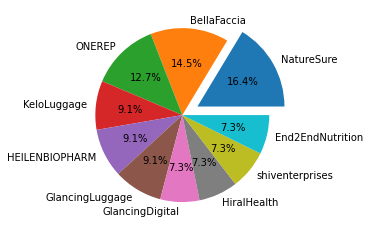

In [70]:
explode=(0.2,0,0,0,0,0,0,0,0,0)
plt.pie(product_value[:10],labels=product_names[:10],explode=explode,autopct='%1.1f%%')
plt.show()

<AxesSubplot:xlabel='price(rs)', ylabel='Proportion'>

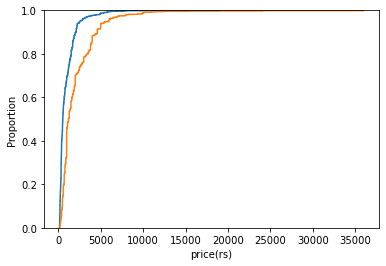

In [71]:
sns.ecdfplot(data=hcp,x=hcp['price(rs)'])
sns.ecdfplot(data=hcp,x=hcp['offer'])

<AxesSubplot:xlabel='views'>

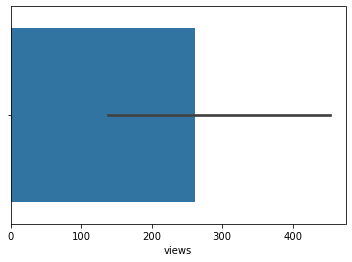

In [72]:
sns.barplot(data=hcp,x='views')

Bi Variate Analysis

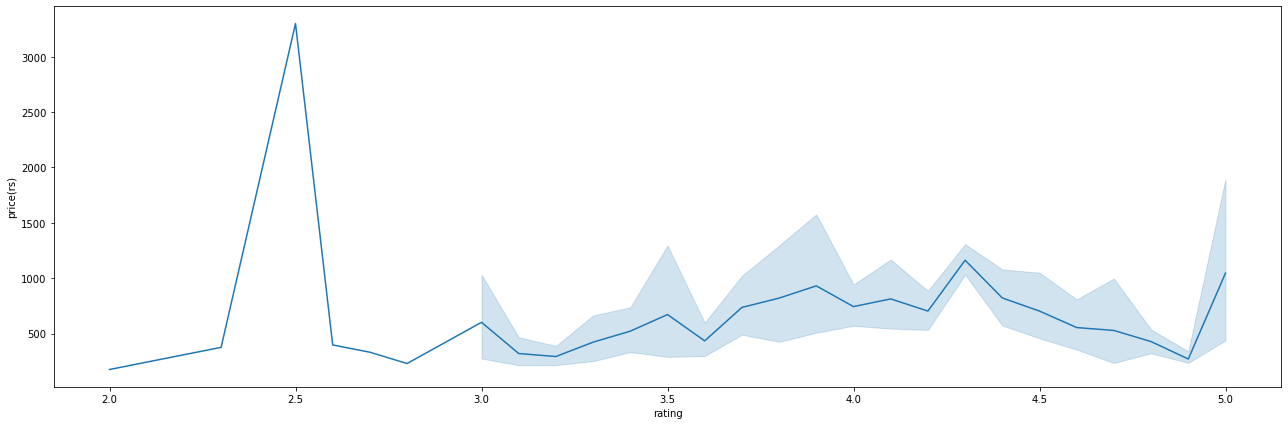

In [73]:
plt.figure(figsize=(22,7))
sns.lineplot(x="rating", y="price(rs)",data=hcp)
plt.show()

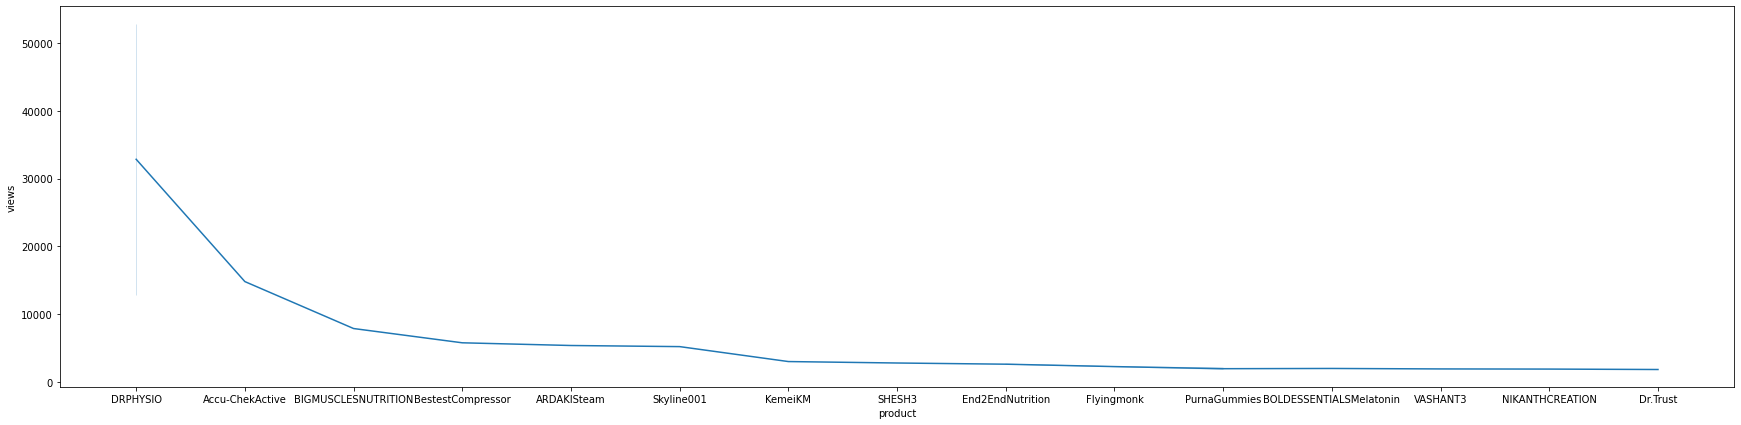

In [74]:
plt.figure(figsize=(30,7))
sns.lineplot(x='product',y='views',data=hcp.nlargest(n=20,columns=['views']))
plt.show()

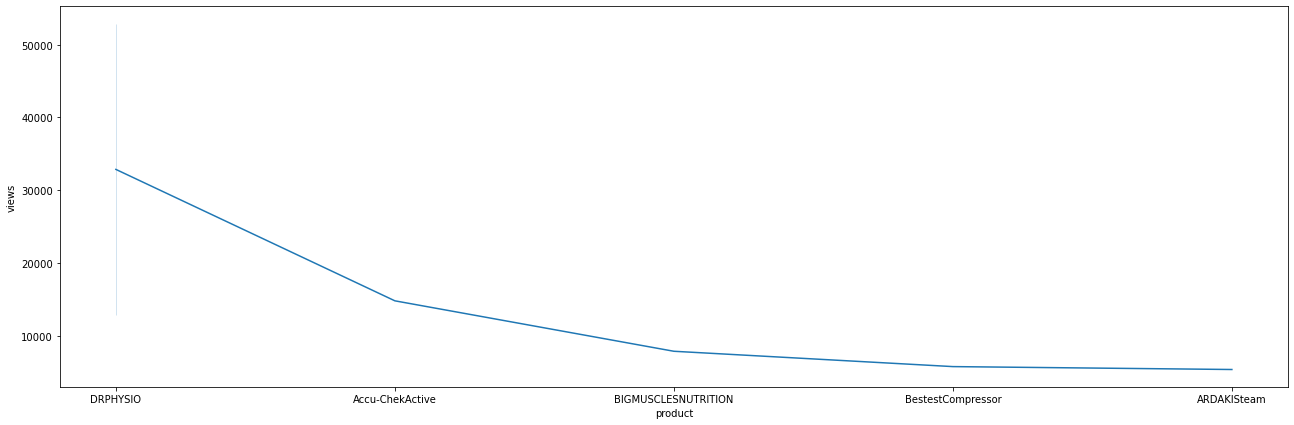

In [75]:
plt.figure(figsize=(22,7))
sns.lineplot(x="product", y="views",data=hcp.nlargest(n=6,columns=['views']))
plt.show()

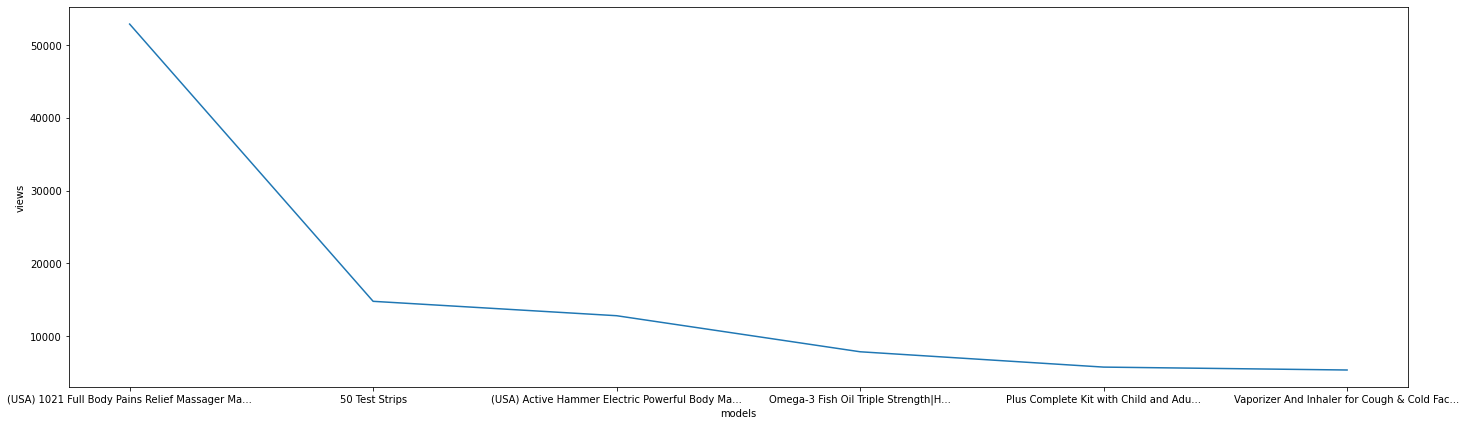

In [76]:
plt.figure(figsize=(24,7))
sns.lineplot(x="models", y="views",data=hcp.nlargest(n=6,columns=['views']))
plt.show()

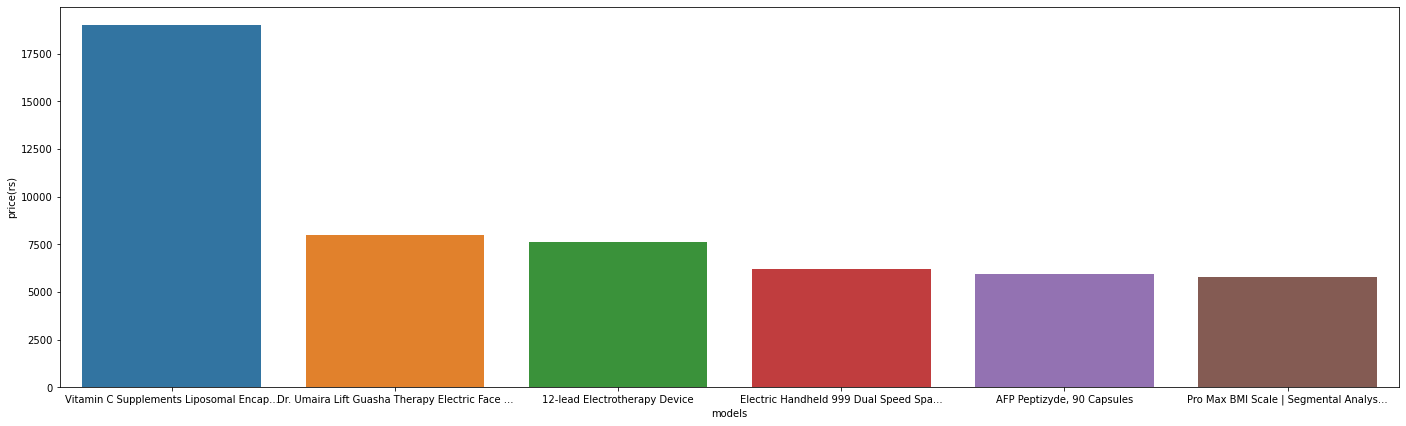

In [77]:
plt.figure(figsize=(24,7))
sns.barplot(x="models", y="price(rs)",data=hcp.nlargest(n=6,columns=['price(rs)']))
plt.show()

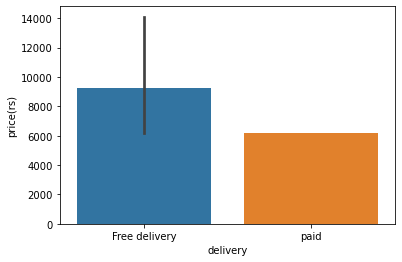

In [78]:
#plt.figure(figsize=(24,7))
sns.barplot(x="delivery", y="price(rs)",data=hcp.nlargest(n=6,columns=['price(rs)']))
plt.show()

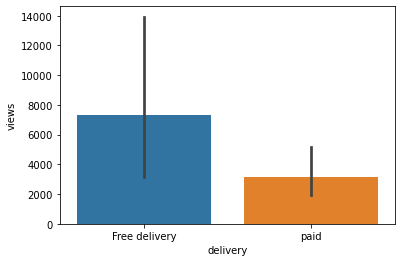

In [82]:
sns.barplot(x="delivery", y="views",data=hcp.nlargest(n=20,columns=['views']))
plt.show()

Multi Variate Analysis

<AxesSubplot:>

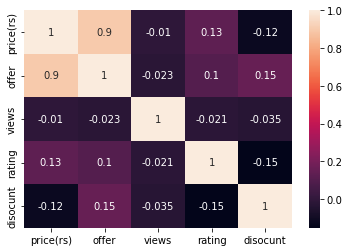

In [80]:
sns.heatmap(hcp.corr(),annot=True)

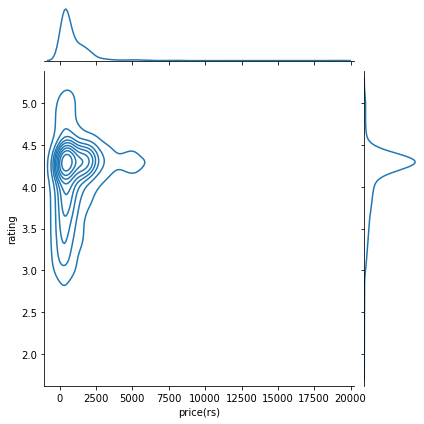

In [81]:
sns.jointplot(data=hcp,x='price(rs)',y='rating',kind='kde')